In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("../data/loan_approval_data.csv")

In [3]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    str    
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    str    
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    str    
 15  Property_Area       950 non-null    str    
 16  Education_Level   

In [5]:
df.isna().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [6]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handle missing values

In [7]:
numerical_col = df.select_dtypes(include="float64").columns # we can use include = number for all types of numerical values
categorical_col = df.select_dtypes(include="str").columns

In [8]:
print(numerical_col, "\n\n", categorical_col)

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='str') 

 Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='str')


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
numerical_imp_mean = SimpleImputer(strategy='mean')
df[numerical_col] = numerical_imp_mean.fit_transform(df[numerical_col])

In [11]:
categorical_col_imp = SimpleImputer(strategy='most_frequent')
df[categorical_col] = categorical_col_imp.fit_transform(df[categorical_col])

In [12]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [13]:
df.isna().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# Explaratory data analysis (EDA)

In [14]:
class_count = df["Loan_Approved"].value_counts()
class_count

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

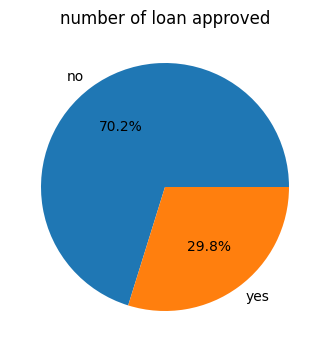

In [15]:
plt.figure(figsize=(4,10))
plt.title("number of loan approved")
plt.pie(class_count, labels=["no", "yes"], autopct="%1.1f%%")
plt.show()

[Text(0, 0, '621'), Text(0, 0, '379')]

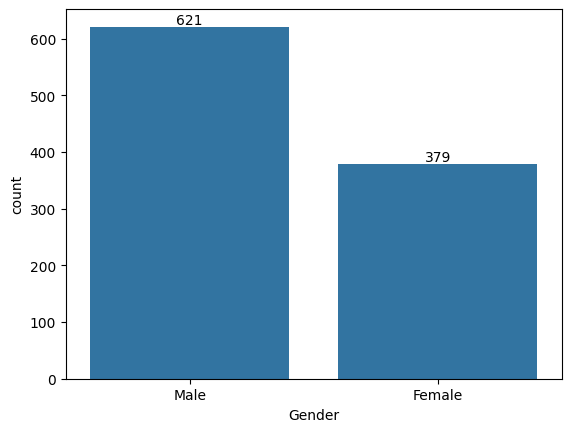

In [16]:
# categorical analysis

gender_count = df["Gender"].value_counts()
ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Age', ylabel='Count'>

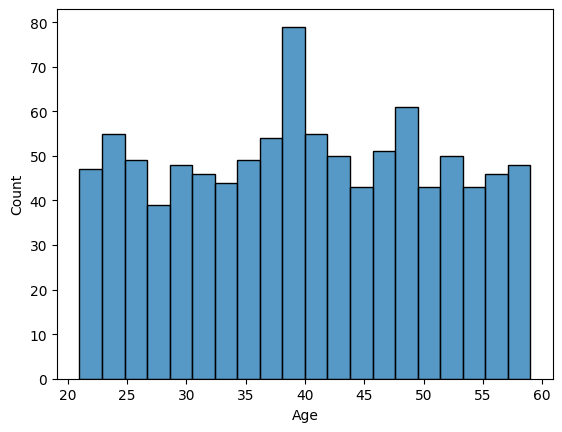

In [17]:
sns.histplot(df["Age"], bins= 20)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

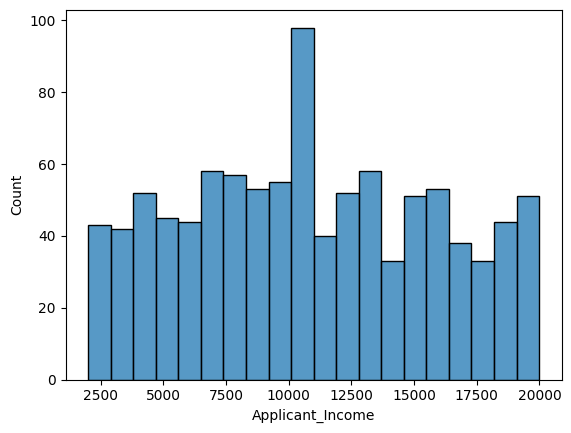

In [18]:
sns.histplot(df["Applicant_Income"], bins= 20)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

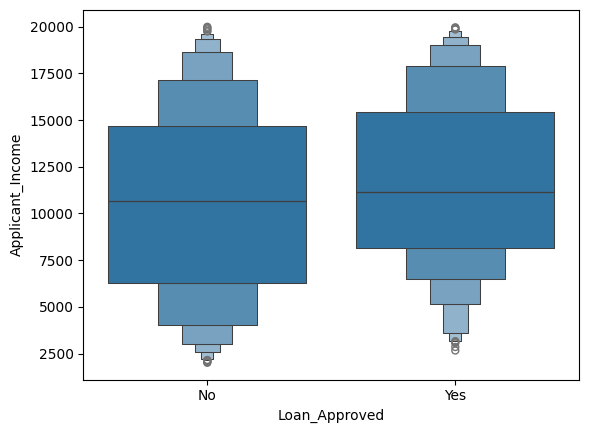

In [19]:
# outlier detection
sns.boxenplot(data=df, x= "Loan_Approved", y = "Applicant_Income")

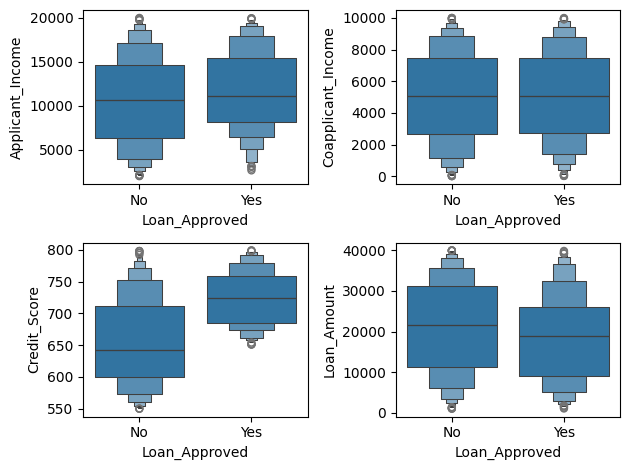

In [20]:
fig, axes = plt.subplots(2,2)
sns.boxenplot(ax=axes[0,0],data= df,x="Loan_Approved", y = "Applicant_Income")
sns.boxenplot(ax=axes[0,1],data= df,x="Loan_Approved", y = "Coapplicant_Income")
sns.boxenplot(ax=axes[1,0],data= df,x="Loan_Approved", y = "Credit_Score")
sns.boxenplot(ax=axes[1,1],data= df,x="Loan_Approved", y = "Loan_Amount")
plt.tight_layout()

In [21]:
#sns.pairplot(df)
#plt.show()

# Feature Encoding

In [22]:
# columns for one-hot encoding

nominal_col = ["Employment_Status","Marital_Status", "Loan_Purpose","Property_Area", "Gender", "Employer_Category"]
# columns for label encoding
ordinal_col = ["Education_Level", "Loan_Approved"]


le = LabelEncoder()
for col in ordinal_col:
    df[col] = le.fit_transform(df[col].astype(str))

In [23]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [24]:
ohe = OneHotEncoder(drop="first",sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[nominal_col])

new_col_name = ohe.get_feature_names_out(nominal_col)

encoded_df = pd.DataFrame(encoded, columns=new_col_name, index=df.index)


In [25]:
df = pd.concat([df,encoded_df], axis=1)
df = df.drop(nominal_col, axis=1)

In [26]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level                 

# correlation heatmap

In [33]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()
#corr_matrix
corr_matrix["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

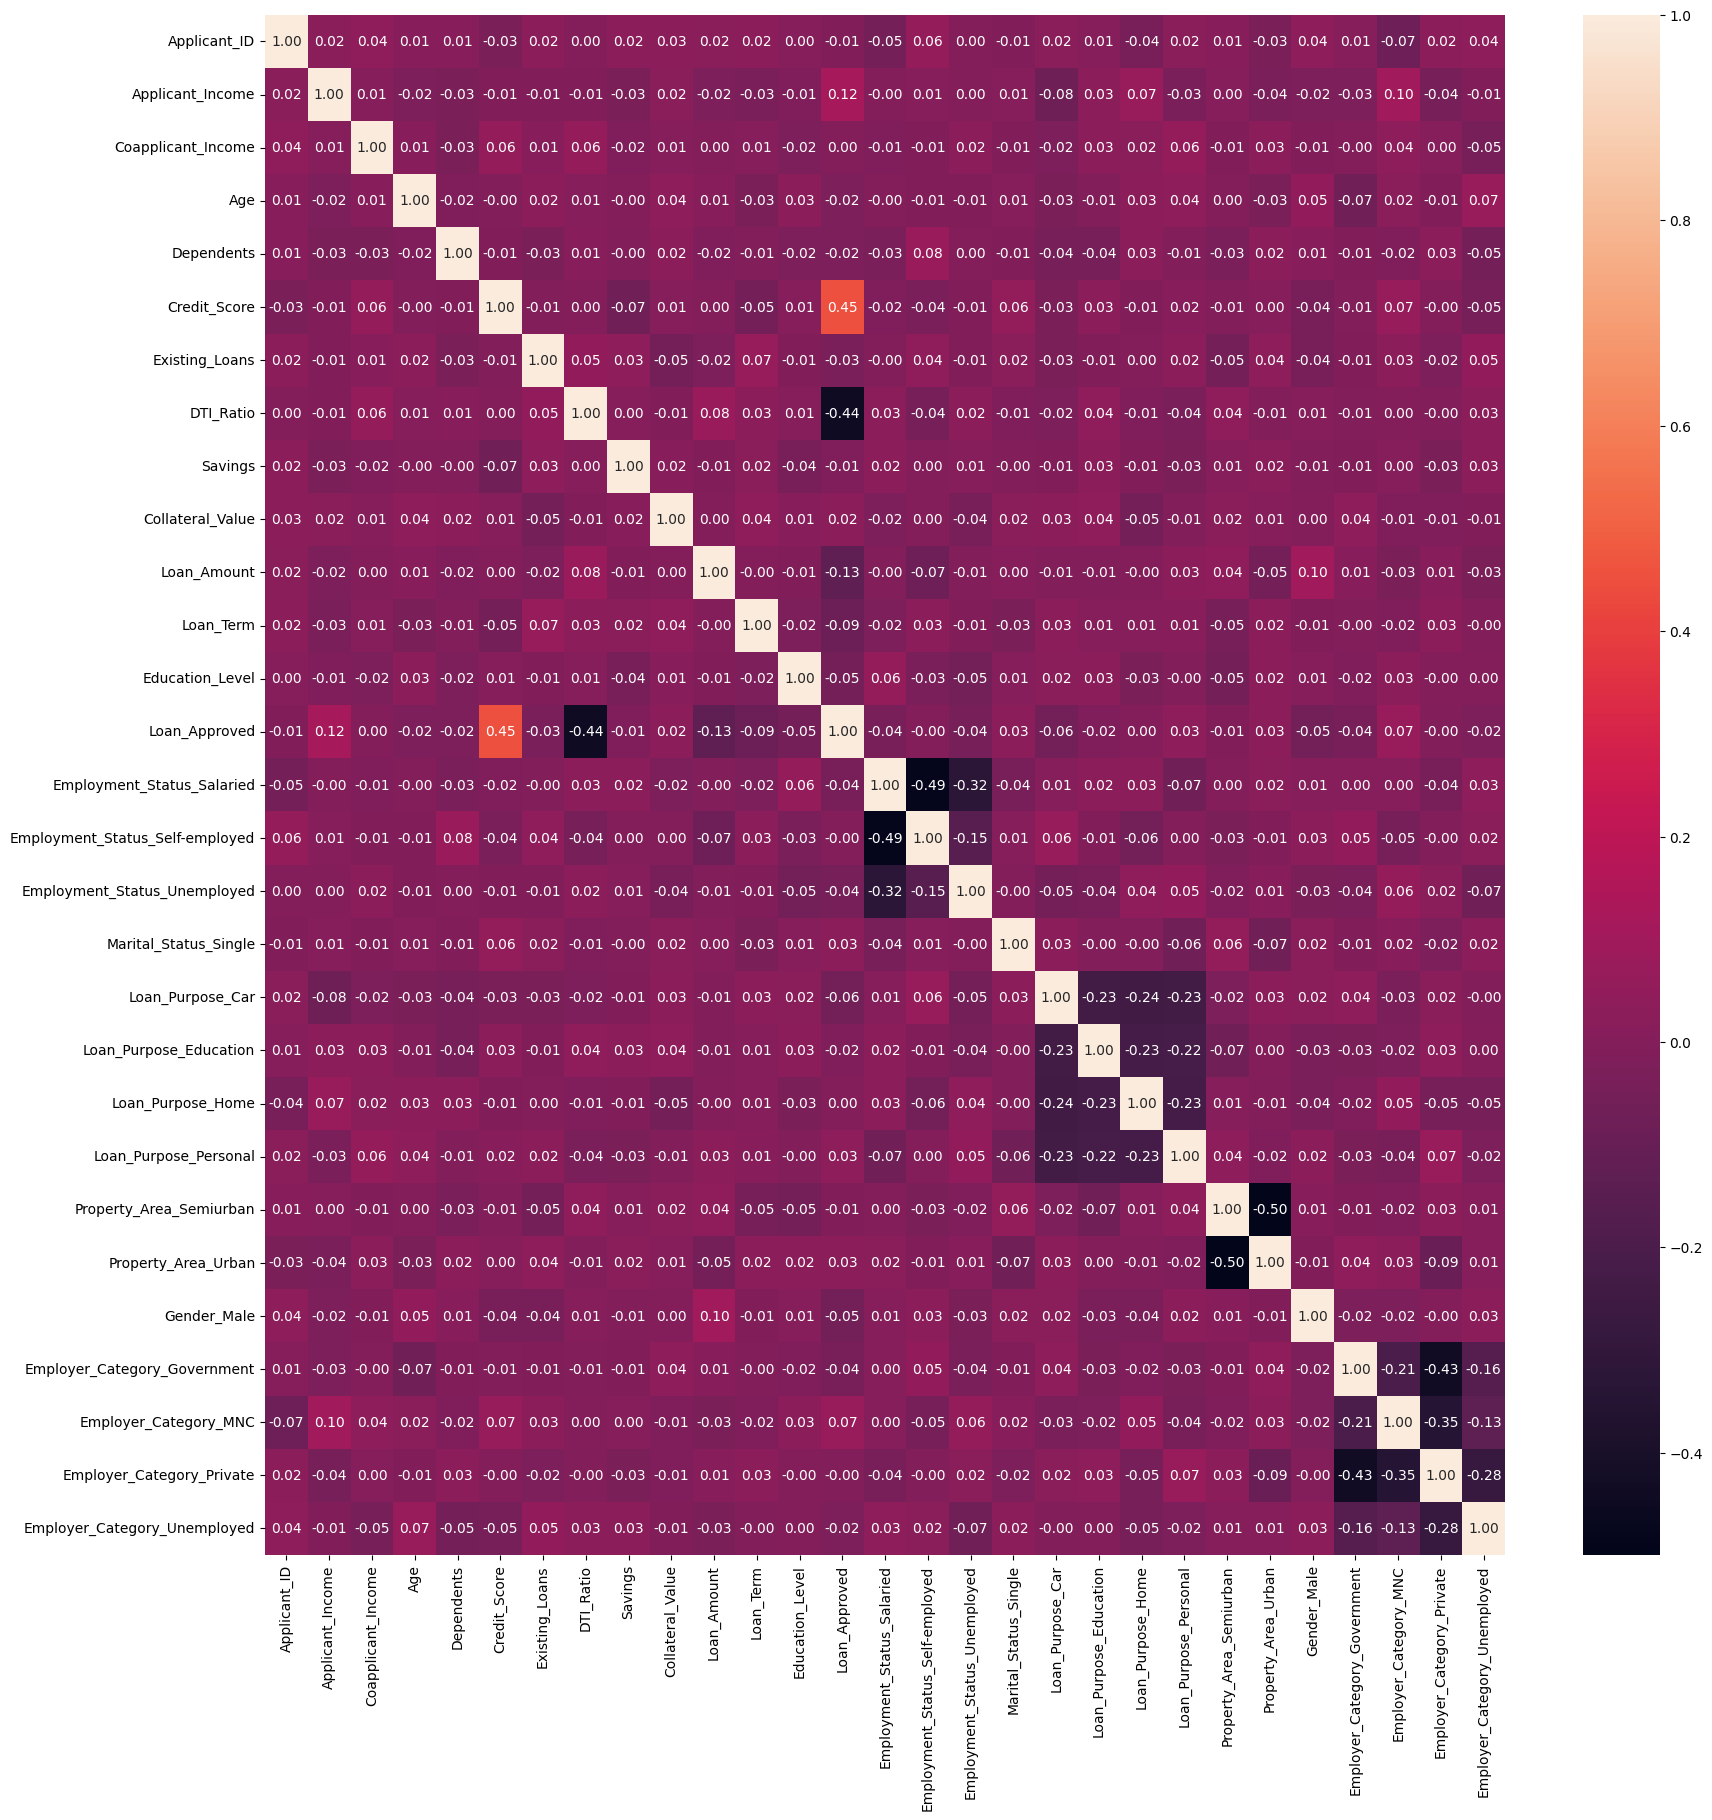

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# scaling and spliting the data

In [42]:
x = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
x_train

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,30.00,5890.000000,8041.0,31.000000,0.000000,603.000000,0.000000,0.110000,11906.0,8150.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,536.00,4779.000000,529.0,50.000000,0.000000,614.000000,0.000000,0.210000,5369.0,5430.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,696.00,10852.571579,8927.0,36.000000,0.000000,584.000000,4.000000,0.220000,3186.0,24802.792632,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,558.00,2384.000000,2113.0,39.971579,1.000000,726.000000,4.000000,0.340000,11882.0,48542.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,837.00,5228.000000,5249.0,42.000000,1.000000,676.033684,1.950526,0.180000,17669.0,24802.792632,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107.00,10755.000000,4107.0,59.000000,0.000000,560.000000,2.000000,0.347263,6806.0,5932.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
270,271.00,2569.000000,5068.0,39.971579,1.474737,673.000000,1.000000,0.530000,3563.0,21699.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,861.00,9783.000000,6099.0,31.000000,0.000000,703.000000,1.000000,0.347263,2575.0,48348.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
435,501.22,16512.000000,3762.0,53.000000,1.000000,616.000000,1.000000,0.320000,14780.0,3598.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [55]:
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)